In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist #библиотека бызы данных образцов рукописного написания цифр
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


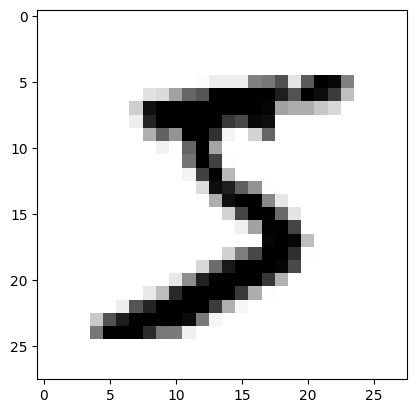

In [3]:
plt.imshow(x_train[0], cmap='binary', interpolation='nearest')
plt.show()

In [4]:
#ноормализация входных данных
x_train = x_train/255
x_test = x_test/255

In [5]:
#перобразование выходных значений в векторы по категориям
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

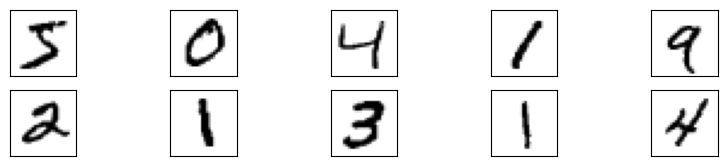

In [6]:
#отображение первых 10 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

###Формирование модели НС и вывод ее структуры

In [7]:
#структура полносвязной нейронной сети
#784 входов, 128 скрытого слоя ReLu, 10 выходношо слоя softmax
model = keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [8]:
#компиляция/оптимизация по Adam и критерием - категориальная кросс-энтропия(крит качества)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#запуск процесса обучения 80%-обучающая выборка, 20%-выборка валидации
model.fit(x_train, y_train_cat, batch_size=32, epochs=4, validation_split=0.3)

Epoch 1/4
1313/1313 [==============================] - 15s 10ms/step - loss: 0.3029 - accuracy: 0.9137 - val_loss: 0.1775 - val_accuracy: 0.9476
Epoch 2/4
1313/1313 [==============================] - 11s 9ms/step - loss: 0.1308 - accuracy: 0.9620 - val_loss: 0.1314 - val_accuracy: 0.9591
Epoch 3/4
1313/1313 [==============================] - 11s 9ms/step - loss: 0.0894 - accuracy: 0.9735 - val_loss: 0.1147 - val_accuracy: 0.9653
Epoch 4/4
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0653 - accuracy: 0.9809 - val_loss: 0.1018 - val_accuracy: 0.9696


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0895 - accuracy: 0.9726


[0.08951129019260406, 0.972599983215332]

1/1 [==============================] - 0s 154ms/step
[[1.8993423e-07 2.0339254e-08 1.6047021e-05 1.3981912e-04 1.6442210e-10
  1.8323607e-06 1.0707120e-12 9.9983907e-01 4.5426657e-07 2.5169120e-06]]
Распознанная цифра: 7


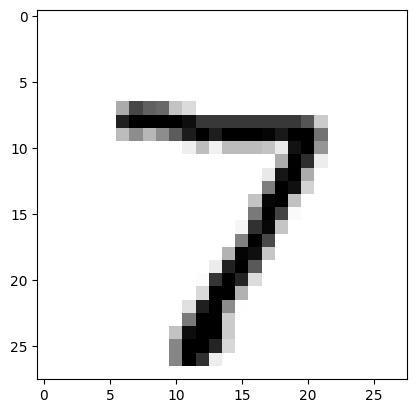

In [ ]:
#проверка распознований цифр
n=0
x=np.expand_dims(x_test[n], axis=0)
res=model.predict(x)
print(res)
print(f"Распознанная цифра: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [ ]:
#распознование всй тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
#выделение неверных значений
#
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = y_test[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(274, 28, 28)


Значение сети:7


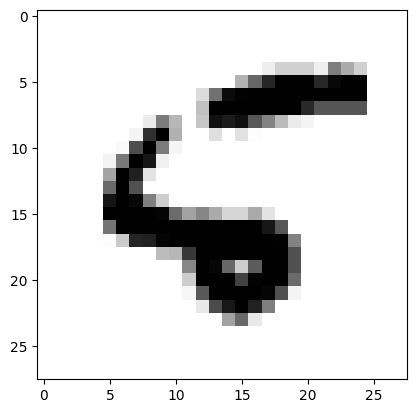

Значение сети:2


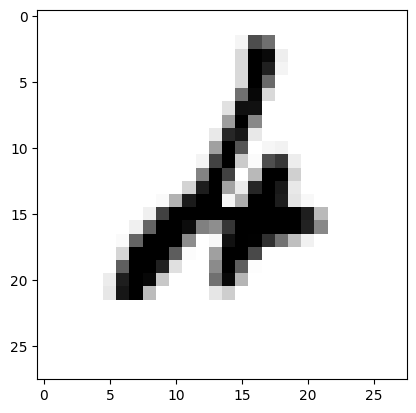

Значение сети:1


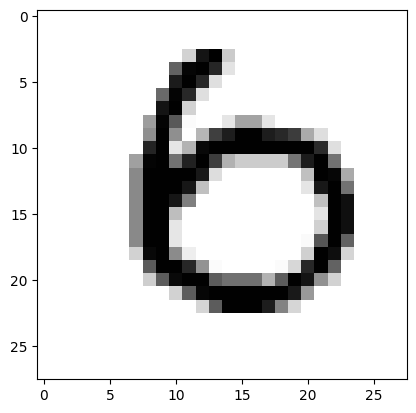

Значение сети:0


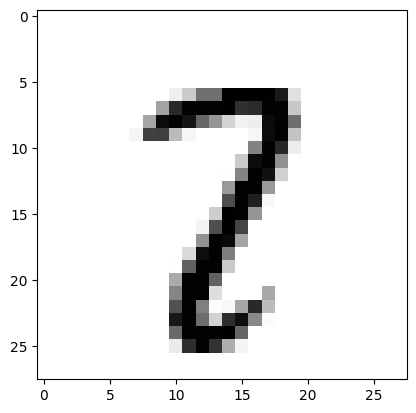

Значение сети:4


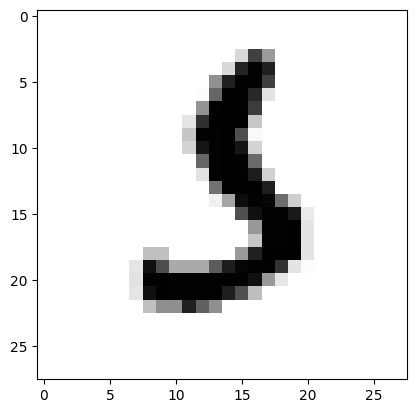

In [ ]:
#вывод первых 5ти неверных результатов
for i in range(5):
  print("Значение сети:"+str(y_test[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()

In [ ]:
import pandas as pd
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

# Путь к вашей папке с данными
data_dir = "/content/drive/MyDrive/python/data"

# Параметры
img_height = 28
img_width = 28
num_classes = 10

# Загрузка изображений и меток
data = np.load('/content/drive/MyDrive/python/data/mnist_compressed.npz')
data = []
labels = []

# Обработка изображений из всех папок
for root, dirs, files in os.walk(data_dir):
    for dir_name in dirs:
        class_dir = os.path.join(root, dir_name)
        # Получаем список файлов в папке
        files = os.listdir(class_dir)
        # Обработка выбранных файлов
        for image_name in files:
          if image_name.endswith(".jpg"):
            image_path = os.path.join(class_dir, image_name)
            image = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
            image = img_to_array(image)
            data.append(image)
            labels.append(dir_name)  # Используем название папки в качестве метки класса

# Преобразование в numpy массивы
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

# Преобразование меток в one-hot encoding формат
labels = to_categorical(labels, num_classes=num_classes)

# Разделение данных на обучающий и тестовый наборы
#X_test, y_test, X_train, y_train =  data['test_images'], data['test_labels'], data['train_images'], data['train_labels']
#train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=0.8)

# Печать размеров обучающего и тестового наборов
print("Размер тренировочного датасета:", train_data.shape)
print("Размер тестового датасета:", test_data.shape)

NameError: name 'train_data' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

# Создание модели CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(test_data, test_labels)
)
# Выбираем случайное изображение из тестового набора данных

# Выводим 5 случайных изображений
for i in range(5):
    # Выбираем случайное изображение из тестового набора данных
    n = np.random.randint(0, len(test_data))

    # Преобразуем изображение в нужный формат и делаем предсказание
    x = np.expand_dims(test_data[n], axis=0)
    prediction = model.predict(x)
    predicted_class = np.argmax(prediction)

    # Отображаем изображение и предсказание модели
    plt.imshow(test_data[n], cmap=plt.cm.binary)
    plt.title(f"Предсказанная цифра: {predicted_class}")
    plt.show()